In [34]:
!scrapy crawl profiles

In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')

In [35]:
data = pd.read_csv('solved-2020-07-17.csv')

In [36]:
data.sort_values(by='solved', inplace=True)

In [37]:
total_solved = data['solved'].sum()

In [38]:
def format_pct(x, data):
    return int(round(x * total_solved / 100))

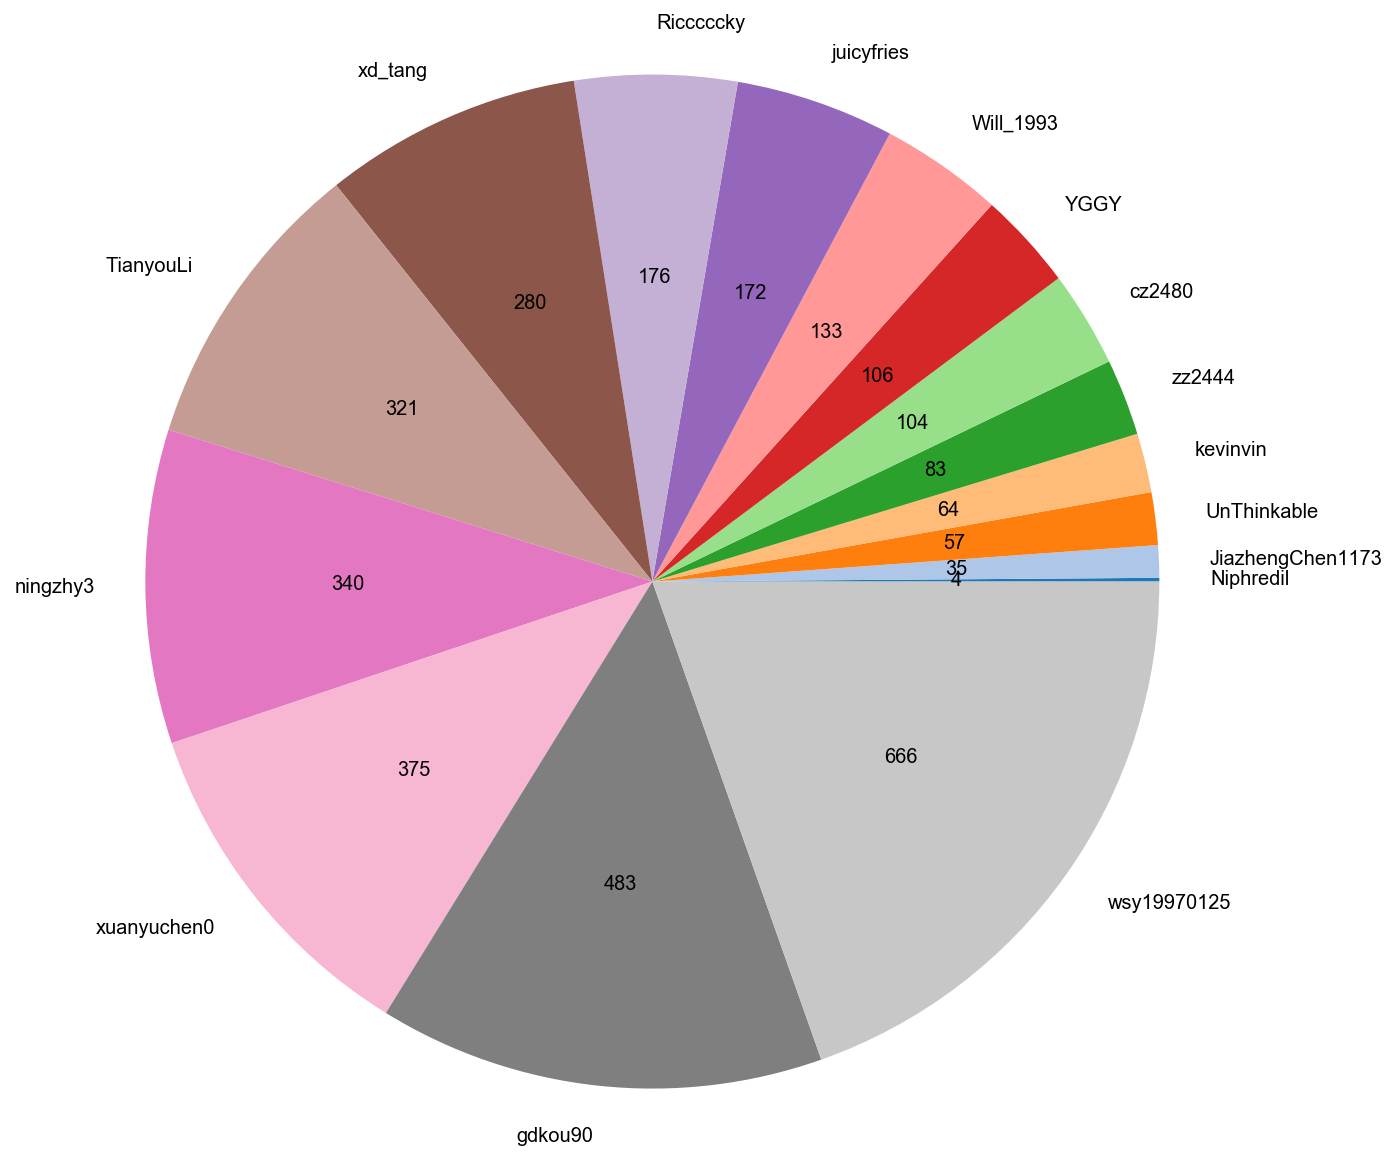

In [45]:
with plt.style.context({"axes.prop_cycle" : plt.cycler("color", plt.cm.tab20.colors)}):
    fig1, ax1 = plt.subplots(figsize=(10,10))
    ax1.pie(data['solved'], labels=data['name'], startangle=0, 
            autopct=lambda x: format_pct(x, data), textprops=dict(color="k"))
    ax1.axis('equal')
    plt.show();

In [46]:
# fig1, ax1 = plt.subplots(figsize=(10,10))
# ax1.pie(data['solved'], labels=data['name'], startangle=0, 
#         autopct=lambda x: format_pct(x, data), textprops=dict(color="k"))
# ax1.axis('equal')
# plt.show();

In [52]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('solved-*.csv')], ignore_index=True)

In [53]:
df.sort_values(by=['date', 'solved'], inplace=True)

In [54]:
filter_list = ['策马奔腾的6希😏', 'хорошo']

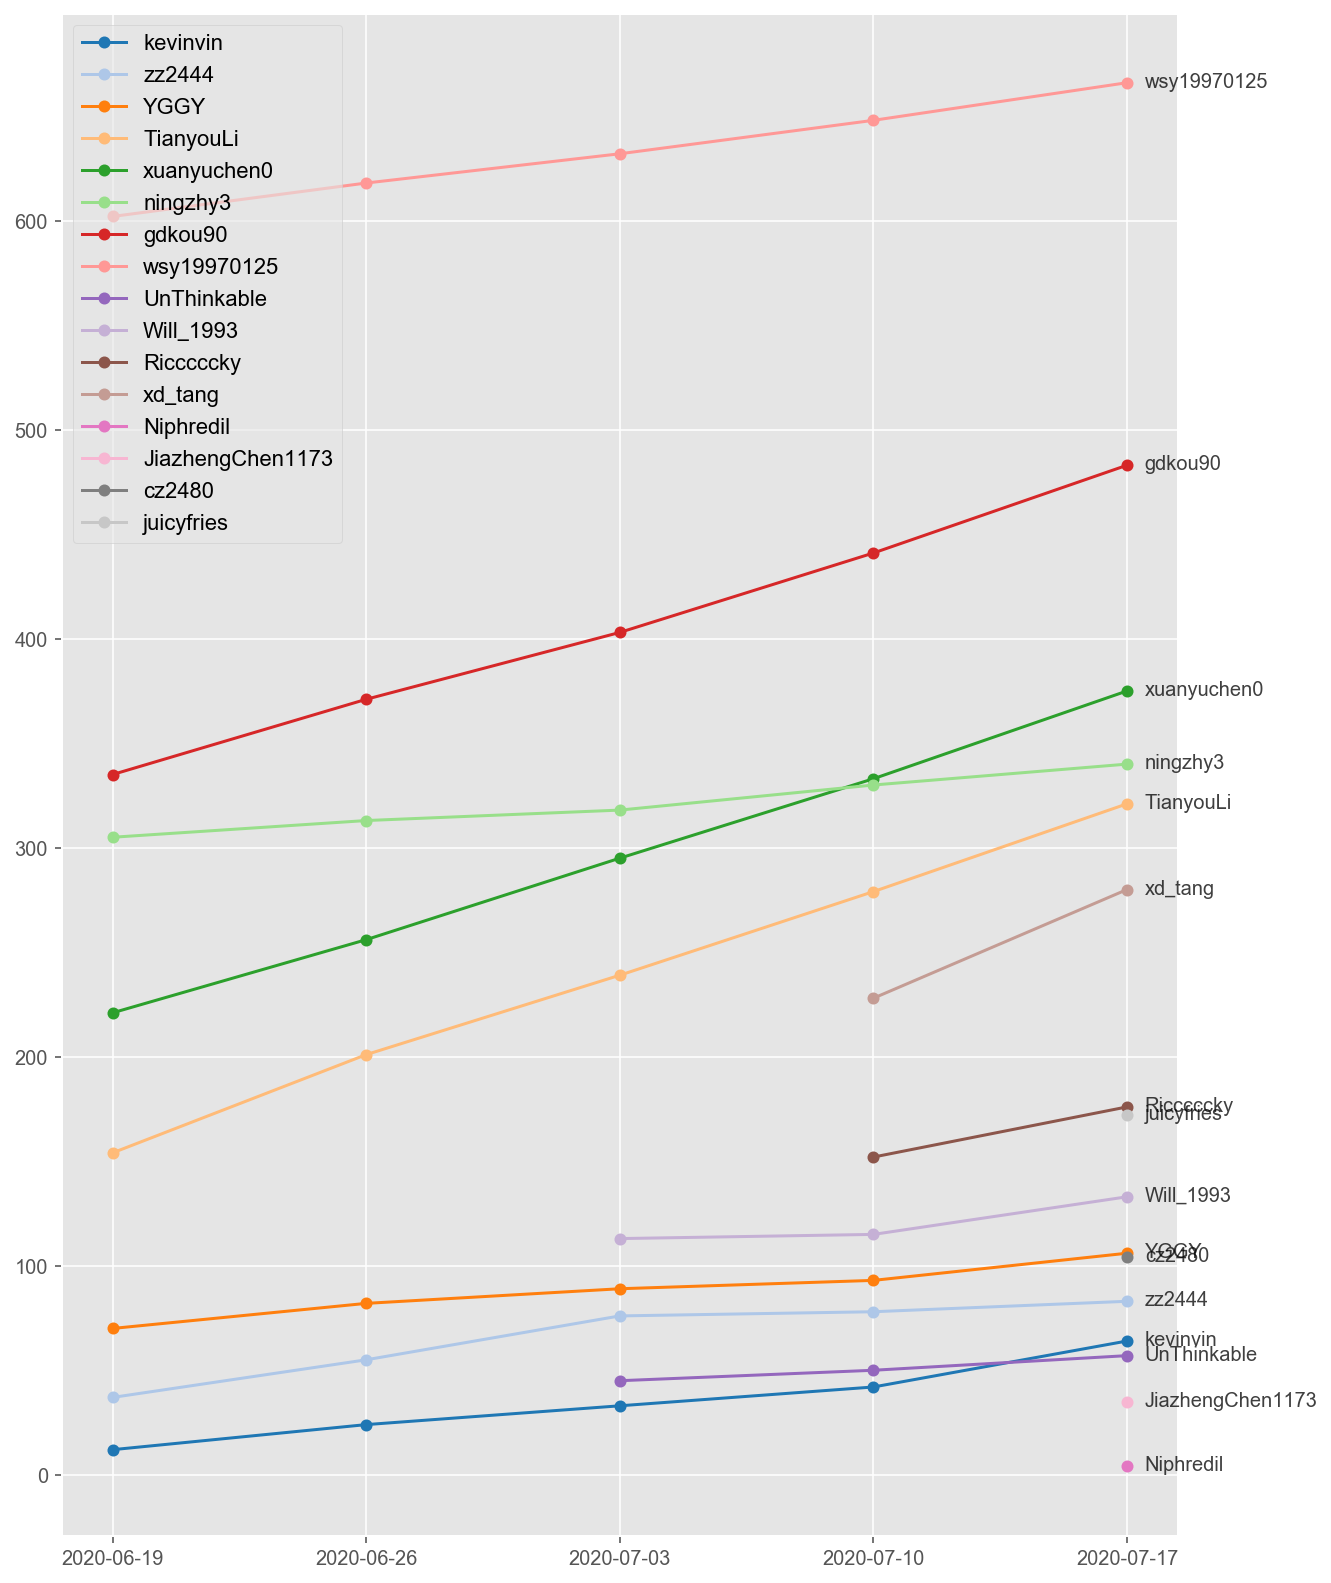

In [56]:
with plt.style.context({"axes.prop_cycle" : plt.cycler("color", plt.cm.tab20.colors)}):
    plt.figure(figsize=(10,14));
    for name in df.name.unique():
        if name in filter_list: continue
        queried = df[df['name'] == name]
        plt.plot(queried['date'], queried['solved'], label=name, marker='o', markersize=5);
        plt.text(4.07, max(queried['solved'])-2, name, {'color': 'k', 'fontsize': 10, 'alpha': 0.75})
    plt.legend(loc='upper left', prop={"size":11}, framealpha=0.6);
    plt.show();